In [ ]:
# 1.0 Importing Libraries

In [1]:
#!pip install pydotplus
#!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as XGBRegressor
import sklearn
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  AdaBoostClassifier


from sklearn.base import ClassifierMixin
from sklearn.utils import all_estimators
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [3]:
# 2.0 Loading Data

In [4]:
Path="IBM HR Analytics Employee Attrition & Performance/WA_Fn-UseC_-HR-Employee-Attrition.csv"

In [5]:
data = pd.read_csv(Path)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
print(f'dataset shape is {data.shape}')

dataset shape is (1470, 35)


In [7]:
print("There are {0} duplicates in the dataset".format(data.duplicated().sum()))

There are 0 duplicates in the dataset


In [8]:
print("Data has {} missing values".format(data.isna().sum().sum()))

Data has 0 missing values


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
# As there are no nulls or duplicated data, There is no preprocessing up till now.

In [11]:
# EDA

In [12]:
sns.set_style("whitegrid")

<Figure size 432x288 with 0 Axes>

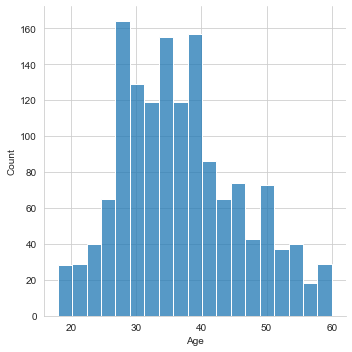

<Figure size 432x288 with 0 Axes>

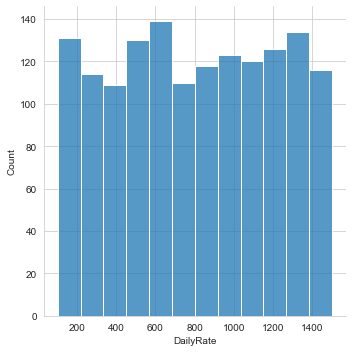

<Figure size 432x288 with 0 Axes>

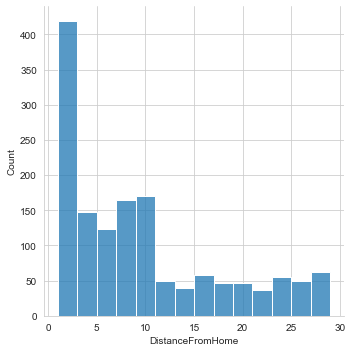

<Figure size 432x288 with 0 Axes>

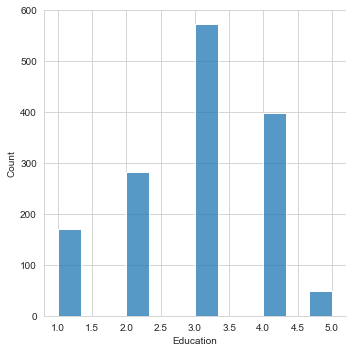

<Figure size 432x288 with 0 Axes>

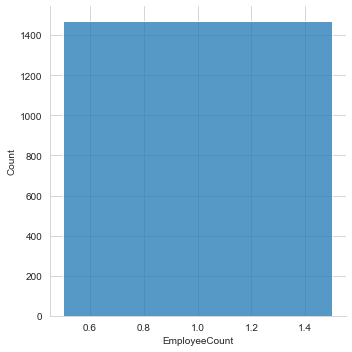

<Figure size 432x288 with 0 Axes>

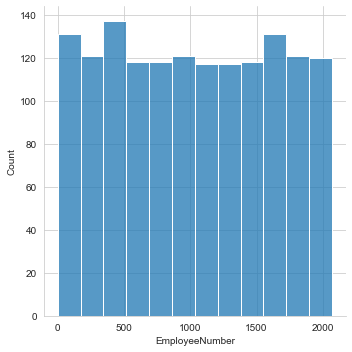

<Figure size 432x288 with 0 Axes>

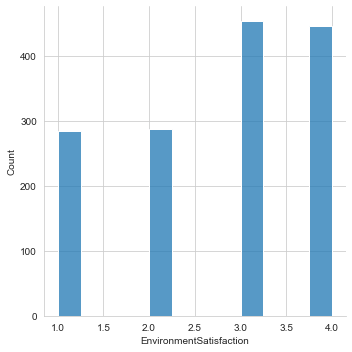

<Figure size 432x288 with 0 Axes>

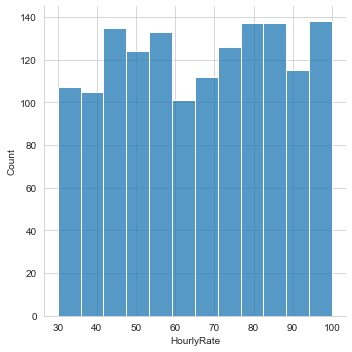

<Figure size 432x288 with 0 Axes>

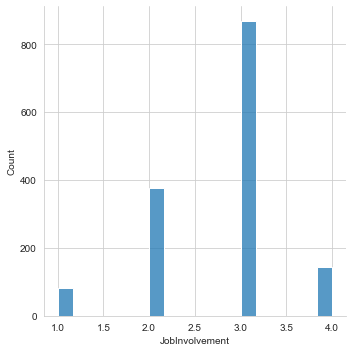

<Figure size 432x288 with 0 Axes>

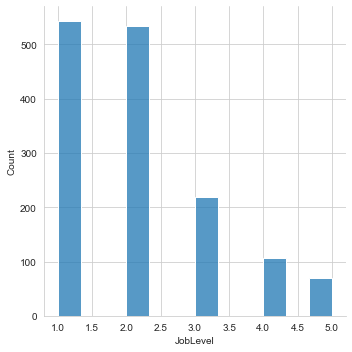

<Figure size 432x288 with 0 Axes>

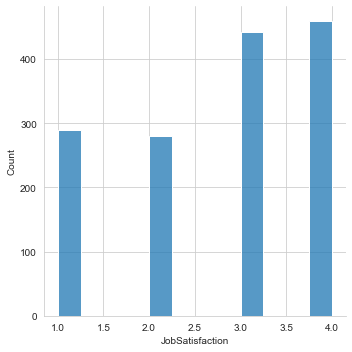

<Figure size 432x288 with 0 Axes>

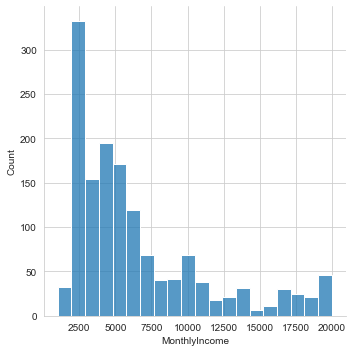

<Figure size 432x288 with 0 Axes>

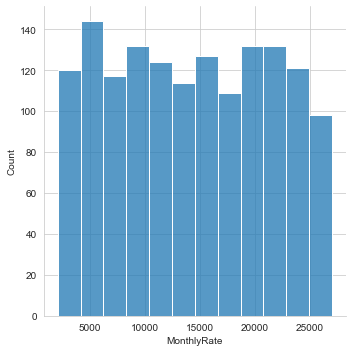

<Figure size 432x288 with 0 Axes>

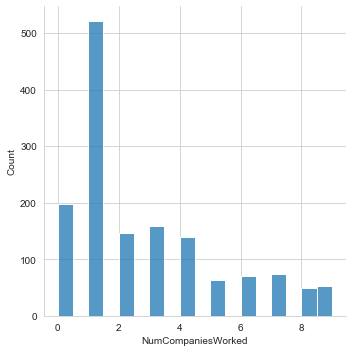

<Figure size 432x288 with 0 Axes>

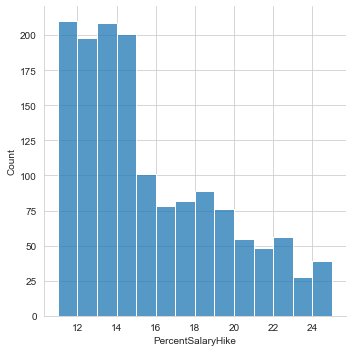

<Figure size 432x288 with 0 Axes>

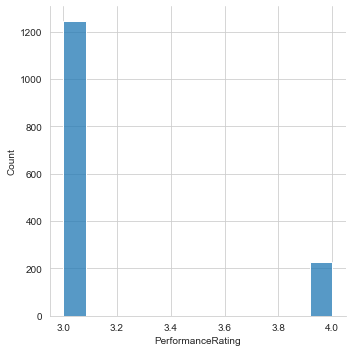

<Figure size 432x288 with 0 Axes>

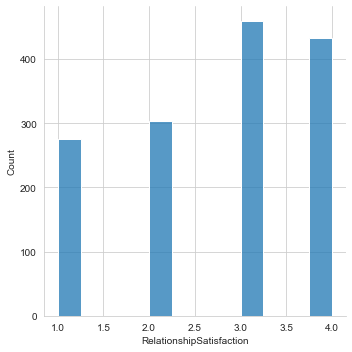

<Figure size 432x288 with 0 Axes>

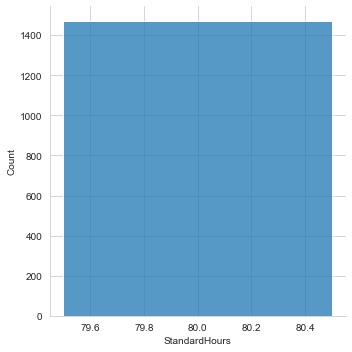

<Figure size 432x288 with 0 Axes>

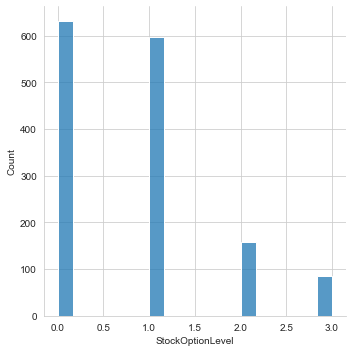

<Figure size 432x288 with 0 Axes>

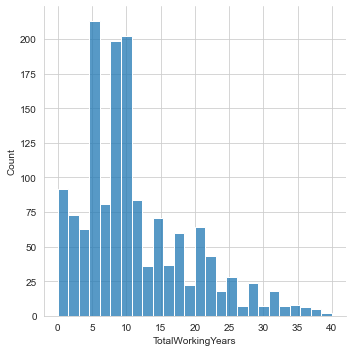

<Figure size 432x288 with 0 Axes>

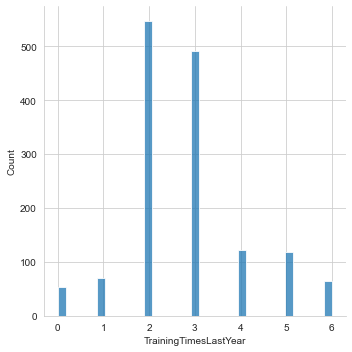

<Figure size 432x288 with 0 Axes>

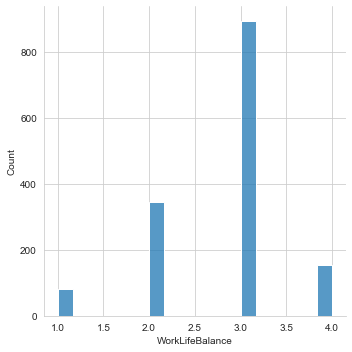

<Figure size 432x288 with 0 Axes>

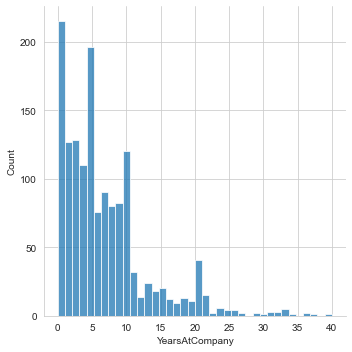

<Figure size 432x288 with 0 Axes>

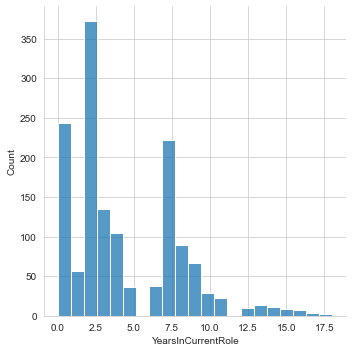

<Figure size 432x288 with 0 Axes>

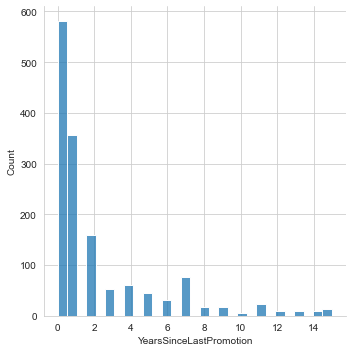

<Figure size 432x288 with 0 Axes>

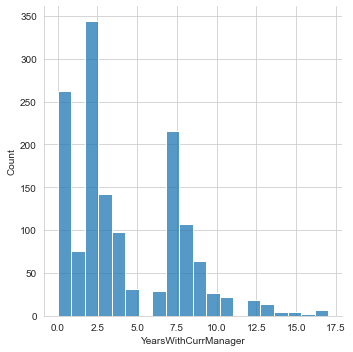

In [13]:
plt.rcParams.update({'figure.max_open_warning': 0})
for column in data.select_dtypes(np.number).columns:
    plt.figure();             # <==================== here!
    ax = sns.displot(data[column]);

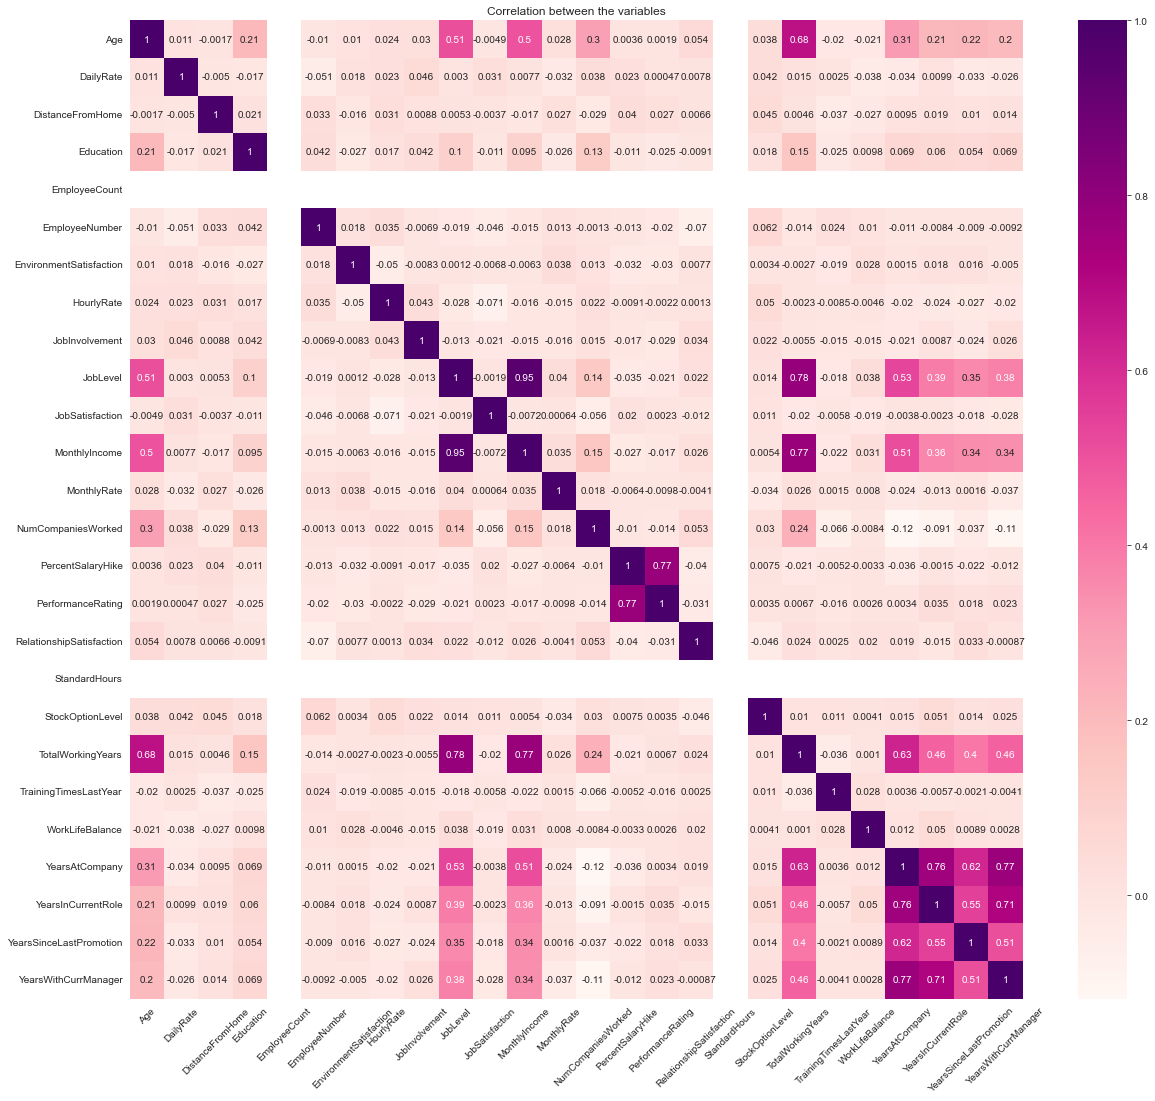

In [14]:
#heatmap for different features
fig, ax = plt.subplots(figsize=(20,18))         # Sample figsize in inches
sns.heatmap(data.corr(), annot = True, ax=ax, cmap="RdPu");
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

In [15]:
# From the heat map we see that StandardHours and EmployeeCount has only one value
data['EmployeeCount'].nunique()
data['StandardHours'].nunique()

1

In [128]:
# Some information about Attrition

In [129]:
data.Attrition

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [16]:
Target_Name = "Attrition"

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


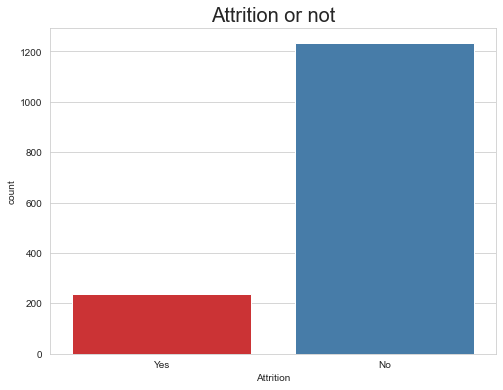

In [17]:
plt.figure(figsize=(8,6));
sns.countplot(data[Target_Name], order=["Yes","No"], palette='Set1');
plt.title('Attrition or not',fontsize=20);
plt.show();

In [18]:
for column in data.columns:
    if (data[column].nunique() == 1):
        data.drop(column, axis=1, inplace=True)
        print("We dropped -->  {}  <--- as it has only one value across the column.".format(column))

We dropped -->  EmployeeCount  <--- as it has only one value across the column.
We dropped -->  Over18  <--- as it has only one value across the column.
We dropped -->  StandardHours  <--- as it has only one value across the column.


In [19]:
Qualitative = [f for f in data.columns if data.dtypes[f] == ('object')]

In [20]:
Qualitative

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [21]:
data[Qualitative]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [22]:
# To use get_dummies
# Please note that this list is created only to see the categorical data that has more than 2 values
# You know that may be if we make one hot encoding for all argument may affect the total model performance
# So I am searching if I am gonna drop some values to make the model performance better
Morethan2 = [] 
Equal2 = []

In [23]:
print("Number of different values in each column")
print()
for i in range( len(Qualitative) ):
    if (data[Qualitative[i]].nunique() > 2):
        print("{}".format(Qualitative[i])+" has ----->    " +str(data[Qualitative[i]].nunique()))
        Morethan2.append(Qualitative[i])
    elif (data[Qualitative[i]].nunique() == 2):
        print("{}".format(Qualitative[i])+" has ----->    " +str(data[Qualitative[i]].nunique()))
        Equal2.append(Qualitative[i])

Number of different values in each column

Attrition has ----->    2
BusinessTravel has ----->    3
Department has ----->    3
EducationField has ----->    6
Gender has ----->    2
JobRole has ----->    9
MaritalStatus has ----->    3
OverTime has ----->    2


In [24]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


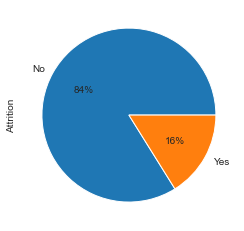

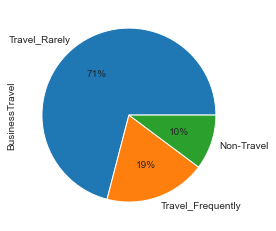

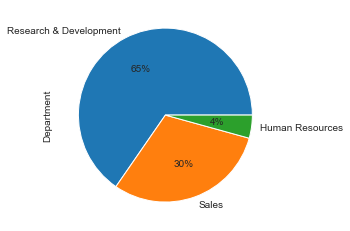

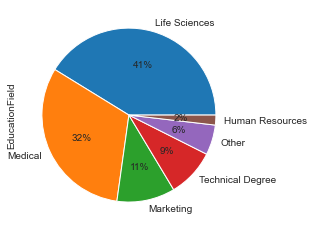

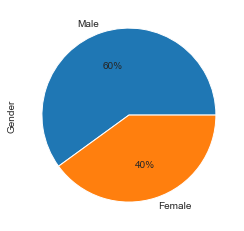

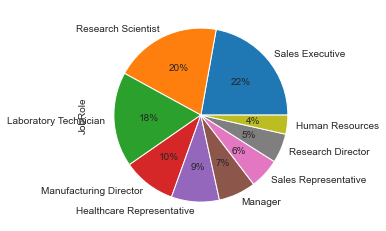

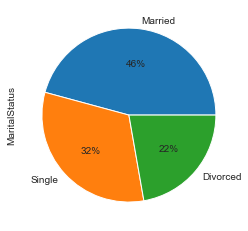

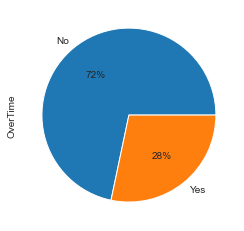

In [25]:
for i in range( len(Qualitative) ):
    data[Qualitative[i]].value_counts().plot(kind='pie',autopct='%1.0f%%', title = None, ylabel= None, fontsize=10)
    plt.show()

In [26]:
#Morethan2
Equal2

['Attrition', 'Gender', 'OverTime']

In [27]:
data['Gender']

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1465      Male
1466      Male
1467      Male
1468      Male
1469      Male
Name: Gender, Length: 1470, dtype: object

In [28]:
# data['Gender'].unique()[1] --->  Male
# data['Gender'].unique()[0] --->  Female
# Replacing Male and Female with 1 and 0.
#data['Gender'] = data['Gender'].map({data['Gender'].unique()[1]:1 ,data[column].unique()[0]:0})

In [29]:
# the next lines to convert columns with two values only into 1, 0.
# I think this way is much better than getdummies as it will make one column instead of two columns.
for column in Equal2:
    data[column] = data[column].map({data[column].unique()[1]:1 ,data[column].unique()[0]:0})

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


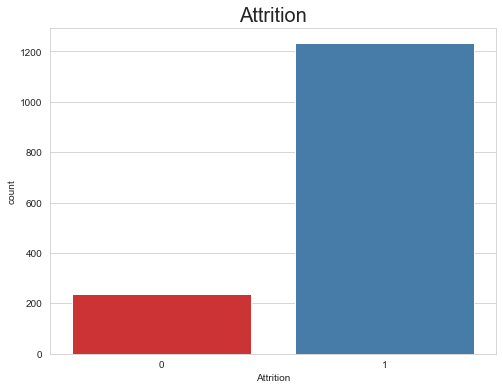

In [30]:
plt.figure(figsize=(8,6));
sns.countplot(data[Target_Name], palette='Set1');
plt.title(Target_Name,fontsize=20);
plt.show();

In [144]:
# So, yes is replaced with 0 and No is replaced with 1

In [31]:
data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [32]:
data=pd.get_dummies(data, columns=Morethan2)

In [33]:
data

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,0,1102,1,2,1,2,0,94,3,...,0,0,0,0,0,1,0,0,0,1
1,49,1,279,8,1,2,3,1,61,2,...,0,0,0,0,1,0,0,0,1,0
2,37,0,1373,2,2,4,4,1,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,1,1392,3,4,5,4,0,56,3,...,0,0,0,0,1,0,0,0,1,0
4,27,1,591,2,1,7,1,1,40,3,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,23,2,2061,3,1,41,4,...,1,0,0,0,0,0,0,0,1,0
1466,39,1,613,6,1,2062,4,1,42,2,...,0,0,0,0,0,0,0,0,1,0
1467,27,1,155,4,3,2064,2,1,87,4,...,0,0,1,0,0,0,0,0,1,0
1468,49,1,1023,2,3,2065,4,1,63,2,...,0,0,0,0,0,1,0,0,1,0


In [35]:
correlation_matrix = data.corr().round(2)
correlation_matrix[Target_Name]

Age                                  0.16
Attrition                            1.00
DailyRate                            0.06
DistanceFromHome                    -0.08
Education                            0.03
EmployeeNumber                       0.01
EnvironmentSatisfaction              0.10
Gender                              -0.03
HourlyRate                           0.01
JobInvolvement                       0.13
JobLevel                             0.17
JobSatisfaction                      0.10
MonthlyIncome                        0.16
MonthlyRate                         -0.02
NumCompaniesWorked                  -0.04
OverTime                             0.25
PercentSalaryHike                    0.01
PerformanceRating                   -0.00
RelationshipSatisfaction             0.05
StockOptionLevel                     0.14
TotalWorkingYears                    0.17
TrainingTimesLastYear                0.06
WorkLifeBalance                      0.06
YearsAtCompany                    

In [36]:
data[Target_Name].value_counts()
ratio = data[Target_Name].value_counts()[1]/ len(data[Target_Name])
print("We have {}% ones and the rest are zeros".format(round(ratio,4)*100))
print("We have to make sure that not all predictions are ones")

We have 83.88% ones and the rest are zeros
We have to make sure that not all predictions are ones


In [37]:
#!pip install catboost

In [38]:
# This functions contains Too much manual work, The second one is much better
# To run this function you need to call each model by name This functions,
# But in the second one, all you need to do is to import sklearn that contains all models
'''
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import SGDClassifier, RidgeClassifierCV, RidgeClassifier
from sklearn.linear_model import Perceptron, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.ensemble import StackingRegressor, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import  HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR
from catboost import Pool, CatBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import BernoulliNB

def Best_Classifier(X_train, y_train, X_test, y_test):
    models = [LogisticRegression(),LogisticRegressionCV(),DecisionTreeClassifier(),KNeighborsClassifier(),
              DecisionTreeRegressor(),SGDClassifier(),RidgeClassifier(),RidgeClassifierCV(),Perceptron(),
              PassiveAggressiveClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),GaussianNB(),
              SVC(kernel='rbf'),LinearDiscriminantAnalysis(),ExtraTreesClassifier(),BaggingClassifier(),
              HistGradientBoostingClassifier(), AdaBoostClassifier(),QuadraticDiscriminantAnalysis(),
             NearestCentroid(),MLPClassifier(),GaussianProcessClassifier(),BernoulliNB()]   # ,CatBoostClassifier()
    

    
    Model_Info = []  # Contians Sensitivity, Specificity,... for each model
    roc_List = []    # Contains False Positive Rate, Auc,.... for each model
    
    for model in models:
        cv = RepeatedKFold(n_splits=7, n_repeats=3, random_state=1)
        scores1 = cross_val_score(model, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1)
        scores2 = cross_val_score(model, X_test, y_test, scoring='accuracy', cv = cv, n_jobs=-1)
    
        model.fit(X_train,y_train)
        Y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test,Y_pred)
        TP = cm[0, 0]
        FP = cm[0, 1]
        FN = cm[1, 0]
        TN = cm[1, 1]
        Sensitivity = (TP/ (TP + FN) )
        Specificity = (TN/ (TN + FP) )
        Presicion = (TP / (TP + FP) )
        F1Score = 2*( (Presicion*Sensitivity) / (Presicion+Sensitivity) )
        sub_data = []    # Sensitivity, Specificity,... for a model
        sub_data.append(str(model).strip("()"))
        sub_data.append(Sensitivity)
        sub_data.append(Specificity)
        sub_data.append(Presicion)
        sub_data.append(F1Score)
        sub_data.append(np.round(scores1.mean()*100,2))
        sub_data.append(np.round(scores2.mean()*100,2))
        Model_Info.append(sub_data)
    
    
    
        try:
            y_score_model = model.predict_proba(X_test)[:,1]
            false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score_model)
            AUC_Score = round(roc_auc_score(y_test, y_score_model)*100,4)
            roc_element = [] # FPR, TPR, Threshold,... of a model
            roc_element.append(str(model).strip("()"))
            roc_element.append(false_positive_rate)
            roc_element.append(true_positive_rate)
            roc_element.append(threshold)
            roc_element.append(AUC_Score)
            roc_List.append(roc_element)
        except:
            pass
    ROC = pd.DataFrame(roc_List, columns=['Name','False Positive Rate','True Positive Rate','Threshold','AUC_Score'])
    Model_Information = pd.DataFrame(Model_Info,columns=['Name','Sensitivity','Specificity','Precision','F1Score','Training Accuracy (%)','Testing Accuracy (%)'])

    return ROC, Model_Information
'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import LogisticRegression, LogisticRegressionCV\nfrom sklearn.linear_model import SGDClassifier, RidgeClassifierCV, RidgeClassifier\nfrom sklearn.linear_model import Perceptron, PassiveAggressiveClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier \nfrom sklearn.ensemble import StackingRegressor, BaggingClassifier, ExtraTreesClassifier\nfrom sklearn.ensemble import  HistGradientBoostingClassifier, AdaBoostClassifier\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.metrics import accuracy_score,confusion_matrix\nfrom sklearn.metrics import roc_curve, roc_auc_score\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn import svm\nfrom sklearn.svm import SVC\nfrom sklearn.svm import SVR\nfrom catboost impor

In [39]:
def Best_Num_Features(data, Target_Name, TestSize, Model_Name, Corr):
    X = data.copy()
    y = data[Target_Name]
    X.drop(Target_Name, axis=1, inplace=True)
    To_Define_Number = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TestSize, random_state = 101, shuffle=True)
    model = Model_Name.fit(X_train, y_train)  # AdaBoostClassifier(), LogisticRegression()
    cv = RepeatedKFold(n_splits=7, n_repeats=3, random_state=1)
    scores1 = cross_val_score(model, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1)
    scores2 = cross_val_score(model, X_test, y_test, scoring='accuracy', cv = cv, n_jobs=-1)
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,Y_pred)
    TP = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TN = cm[1, 1]
    Sensitivity = (TP/ (TP + FN) )
    Specificity = (TN/ (TN + FP) )
    Presicion = (TP / (TP + FP) )
    F1Score = 2*( (Presicion*Sensitivity) / (Presicion+Sensitivity) )

    Small_List = []
    Small_List.append(str(X_train.shape[1])+" (Normal)")
    Small_List.append(Sensitivity)
    Small_List.append(Specificity)
    Small_List.append(Presicion)
    Small_List.append(F1Score)
    Small_List.append(np.round(scores1.mean()*100,4))
    Small_List.append(np.round(scores2.mean()*100,4))
    To_Define_Number.append(Small_List)
    
    
    data_1 = data.copy()
    correlation_matrix = data_1.corr().round(2)
    correlation_matrix[Target_Name]

    Small_corr = []
    for column in range( correlation_matrix.shape[0] ):
        if ( abs(correlation_matrix[Target_Name][column]) < Corr):
            #print(correlation_matrix.columns[column] , correlation_matrix['Attrition'][column])
            Small_corr.append(correlation_matrix.columns[column])
    data_1.drop(Small_corr, axis=1, inplace=True)
    data_1.drop(Target_Name, axis=1, inplace=True)
    
    X_train, X_test, y_train, y_test = train_test_split(data_1, y, test_size = TestSize, random_state = 101, shuffle=True)
    model = Model_Name.fit(X_train, y_train)  # AdaBoostClassifier(), LogisticRegression()
    cv = RepeatedKFold(n_splits=7, n_repeats=3, random_state=1)
    scores1 = cross_val_score(model, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1)
    scores2 = cross_val_score(model, X_test, y_test, scoring='accuracy', cv = cv, n_jobs=-1)
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,Y_pred)
    TP = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TN = cm[1, 1]
    Sensitivity = (TP/ (TP + FN) )
    Specificity = (TN/ (TN + FP) )
    Presicion = (TP / (TP + FP) )
    F1Score = 2*( (Presicion*Sensitivity) / (Presicion+Sensitivity) )

    Small_List = []
    Small_List.append(str(X_train.shape[1])+" (drop Features<{} corr)".format(Corr))
    Small_List.append(Sensitivity)
    Small_List.append(Specificity)
    Small_List.append(Presicion)
    Small_List.append(F1Score)
    Small_List.append(np.round(scores1.mean()*100,4))
    Small_List.append(np.round(scores2.mean()*100,4))
    To_Define_Number.append(Small_List)
    
    
    for i in range(2, 20):
        Small_List = []
        pca = PCA(n_components=i).fit_transform(data_1)
        X_train, X_test, y_train, y_test = train_test_split(pca, y, test_size = TestSize, random_state = 101, shuffle=True)
    
        model = Model_Name.fit(X_train, y_train)  # AdaBoostClassifier(), LogisticRegression()
        cv = RepeatedKFold(n_splits=7, n_repeats=3, random_state=1)
        scores1 = cross_val_score(model, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1)
        scores2 = cross_val_score(model, X_test, y_test, scoring='accuracy', cv = cv, n_jobs=-1)
        Y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test,Y_pred)
        TP = cm[0, 0]
        FP = cm[0, 1]
        FN = cm[1, 0]
        TN = cm[1, 1]
        Sensitivity = (TP/ (TP + FN) )
        Specificity = (TN/ (TN + FP) )
        Presicion = (TP / (TP + FP) )
        F1Score = 2*( (Presicion*Sensitivity) / (Presicion+Sensitivity) )
        
        Small_List = []
        Small_List.append(str(X_train.shape[1]))
        Small_List.append(Sensitivity)
        Small_List.append(Specificity)
        Small_List.append(Presicion)
        Small_List.append(F1Score)
        Small_List.append(np.round(scores1.mean()*100,4))
        Small_List.append(np.round(scores2.mean()*100,4))
        To_Define_Number.append(Small_List)
    something = pd.DataFrame(To_Define_Number, columns=['# of Features (PCA)','Sensitivity','Specificity','Presicion','F1Score','Training Score (%)','Testing Score (%)'])
    return something

In [40]:
#                              data,  Y column , testsize,classification model, correltion limit to drop    
ModelWithN = Best_Num_Features(data, Target_Name, 0.25, LogisticRegression(), 0.09) # AdaBoostClassifier(), LogisticRegression()
ModelWithN

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

,# of Features (PCA),Sensitivity,Specificity,Presicion,F1Score,Training Score (%),Testing Score (%)
0,50 (Normal),0.800000,0.851240,0.068966,0.126984,84.2400,83.6927
1,20 (drop Features<0.09 corr),0.571429,0.867435,0.206897,0.303797,84.1788,84.2404
2,2,NaN,0.842391,0.000000,NaN,83.7562,84.2353
3,3,NaN,0.842391,0.000000,NaN,83.7562,84.2353
4,4,NaN,0.842391,0.000000,NaN,83.7562,84.2353
5,5,NaN,0.842391,0.000000,NaN,83.7562,84.2353
6,6,NaN,0.842391,0.000000,NaN,83.7562,84.1437
7,7,NaN,0.842391,0.000000,NaN,83.7562,84.1437
8,8,NaN,0.842391,0.000000,NaN,83.9376,83.0569
9,9,0.600000,0.848485,0.051724,0.095238,84.3014,83.8793


In [41]:
# DecisionTreeRegressor(), CatBoostClassifier()
def Best_Classifier(X_train, y_train, X_test, y_test):

    classifiers=[est for est in all_estimators() if issubclass(est[1], ClassifierMixin)]
    Model_Info = []  # Contians Sensitivity, Specificity,... for each model
    roc_List = []    # Contains False Positive Rate, Auc,.... for each model
    Neglected_Models = []
    for i in range(len(classifiers)):
        try:
            model = classifiers[i][1]()
            cv = RepeatedKFold(n_splits=7, n_repeats=3, random_state=1)
            scores1 = cross_val_score(model, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1)
            print('Average Training Score for {} = {}%'.format(classifiers[i][0],np.round(scores1.mean()*100,2)))
            scores2 = cross_val_score(model, X_test, y_test, scoring='accuracy', cv = cv, n_jobs=-1)
            print('Average Testing Score for {} = {}%'.format(classifiers[i][0],np.round(scores2.mean()*100,2)))
            
            
            model.fit(X_train,y_train)
            Y_pred = model.predict(X_test)
            cm = confusion_matrix(y_test,Y_pred)
            TP = cm[0, 0]
            FP = cm[0, 1]
            FN = cm[1, 0]
            TN = cm[1, 1]
            Sensitivity = (TP/ (TP + FN) )
            Specificity = (TN/ (TN + FP) )
            Presicion = (TP / (TP + FP) )
            F1Score = 2*( (Presicion*Sensitivity) / (Presicion+Sensitivity) )
            sub_data = []    # Sensitivity, Specificity,... for a model
            sub_data.append(str(model).strip("()"))
            sub_data.append(Sensitivity)
            sub_data.append(Specificity)
            sub_data.append(Presicion)
            sub_data.append(F1Score)
            sub_data.append(np.round(scores1.mean()*100,2))
            sub_data.append(np.round(scores2.mean()*100,2))
            Model_Info.append(sub_data)
            
            try:
                y_score_model = model.predict_proba(X_test)[:,1]
                false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score_model)
                AUC_Score = round(roc_auc_score(y_test, y_score_model)*100,4)
                roc_element = [] # FPR, TPR, Threshold,... of a model
                roc_element.append(str(model).strip("()"))
                roc_element.append(false_positive_rate)
                roc_element.append(true_positive_rate)
                roc_element.append(threshold)
                roc_element.append(AUC_Score)
                roc_List.append(roc_element)
            except:
                pass
        except:
            Neglected_Models.append(classifiers[i])
            #pass
    
    ROC = pd.DataFrame(roc_List, columns=['Name','False Positive Rate','True Positive Rate','Threshold','AUC_Score'])
    Model_Information = pd.DataFrame(Model_Info,columns=['Name','Sensitivity','Specificity','Precision','F1Score','Training Accuracy (%)','Testing Accuracy (%)'])
            
    

    return ROC, Model_Information, Neglected_Models

In [43]:
print("1. Not to drop Anything")
print("2. to use PCA")
print("3. to drop features with lower correlation")
Input = input("Enter what do you want 1,2,3")
data_1 = data.copy()
X = data_1.drop(Target_Name,axis=1)
y = data_1[Target_Name]

if (Input == '1'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101, shuffle=True)

elif (Input == '2'):
    Input2 = input("Please, Enter number of PCA")
    pca = PCA(n_components=int(Input2)).fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(pca, y, test_size = 0.25, random_state = 101, shuffle=True)

elif (Input == '3'):
    Small_corr = []
    for column in range( correlation_matrix.shape[0] ):
        if ( abs(correlation_matrix[Target_Name][column]) < 0.09):
            #print(correlation_matrix.columns[column] , correlation_matrix['Attrition'][column])
            Small_corr.append(correlation_matrix.columns[column])
    data_1.drop(Small_corr, axis=1, inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101, shuffle=True)
else:
    pass

1. Not to drop Anything
2. to use PCA
3. to drop features with lower correlation


Enter what do you want 1,2,3 1


In [44]:
#print("Now, we have only {} columns in our data that have strong relation with Attrition".format(data_1.shape[1]))
#corr = data_1.corr()
#plt.figure(figsize=(12,12))
#sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

In [45]:
# I decided not to drop features
# ------------------------- I will use the whole data

In [46]:
ROC, Model_Information, Neglected_Models = Best_Classifier(X_train, y_train, X_test, y_test)
ROC

Average Training Score for AdaBoostClassifier = 86.66%
Average Testing Score for AdaBoostClassifier = 85.14%
Average Training Score for BaggingClassifier = 83.64%
Average Testing Score for BaggingClassifier = 83.14%
Average Training Score for BernoulliNB = 83.3%
Average Testing Score for BernoulliNB = 83.42%
Average Training Score for CalibratedClassifierCV = 83.76%
Average Testing Score for CalibratedClassifierCV = 84.24%


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_10216\667206299.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  Sensitivity = (TP/ (TP + FN) )


Average Training Score for CategoricalNB = nan%
Average Testing Score for CategoricalNB = nan%
Average Training Score for ComplementNB = 53.14%
Average Testing Score for ComplementNB = 49.1%
Average Training Score for DecisionTreeClassifier = 78.55%
Average Testing Score for DecisionTreeClassifier = 75.71%
Average Training Score for DummyClassifier = 83.76%
Average Testing Score for DummyClassifier = 84.24%
Average Training Score for ExtraTreeClassifier = 76.32%


C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_10216\667206299.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  Sensitivity = (TP/ (TP + FN) )


Average Testing Score for ExtraTreeClassifier = 75.62%
Average Training Score for ExtraTreesClassifier = 85.42%
Average Testing Score for ExtraTreesClassifier = 85.14%
Average Training Score for GaussianNB = 73.62%
Average Testing Score for GaussianNB = 75.17%
Average Training Score for GaussianProcessClassifier = 16.24%
Average Testing Score for GaussianProcessClassifier = 15.76%


C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_10216\667206299.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  Specificity = (TN/ (TN + FP) )


Average Training Score for GradientBoostingClassifier = 86.33%
Average Testing Score for GradientBoostingClassifier = 84.42%
Average Training Score for HistGradientBoostingClassifier = 85.54%
Average Testing Score for HistGradientBoostingClassifier = 84.96%
Average Training Score for KNeighborsClassifier = 81.15%
Average Testing Score for KNeighborsClassifier = 82.33%
Average Training Score for LabelPropagation = 16.24%
Average Testing Score for LabelPropagation = 15.76%


D:\Anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_10216\667206299.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  Specificity = (TN/ (TN + FP) )
D:\Anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Average Training Score for LabelSpreading = 16.24%
Average Testing Score for LabelSpreading = 15.76%


D:\Anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_10216\667206299.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  Specificity = (TN/ (TN + FP) )
D:\Anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Average Training Score for LinearDiscriminantAnalysis = 86.96%
Average Testing Score for LinearDiscriminantAnalysis = 84.51%
Average Training Score for LinearSVC = 78.49%
Average Testing Score for LinearSVC = 61.39%


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_10216\667206299.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  Sensitivity = (TP/ (TP + FN) )


Average Training Score for LogisticRegression = 84.24%
Average Testing Score for LogisticRegression = 83.69%


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Average Training Score for LogisticRegressionCV = 85.18%
Average Testing Score for LogisticRegressionCV = 85.14%


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Average Training Score for MLPClassifier = 74.71%
Average Testing Score for MLPClassifier = 70.06%
Average Training Score for MultinomialNB = 53.24%
Average Testing Score for MultinomialNB = 49.28%
Average Training Score for NearestCentroid = 49.7%
Average Testing Score for NearestCentroid = 46.65%
Average Training Score for NuSVC = nan%
Average Testing Score for NuSVC = nan%


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
21 fits failed out of a total of 21.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 189, in sklearn.svm._libsvm.fit
ValueError

Average Training Score for PassiveAggressiveClassifier = 74.83%
Average Testing Score for PassiveAggressiveClassifier = 71.18%


C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_10216\667206299.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  Sensitivity = (TP/ (TP + FN) )


Average Training Score for Perceptron = 75.48%
Average Testing Score for Perceptron = 72.64%


C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_10216\667206299.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  Sensitivity = (TP/ (TP + FN) )


Average Training Score for QuadraticDiscriminantAnalysis = 32.12%
Average Testing Score for QuadraticDiscriminantAnalysis = 59.98%


D:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Average Training Score for RadiusNeighborsClassifier = nan%
Average Testing Score for RadiusNeighborsClassifier = nan%
Average Training Score for RandomForestClassifier = 85.78%
Average Testing Score for RandomForestClassifier = 84.6%
Average Training Score for RidgeClassifier = 86.84%
Average Testing Score for RidgeClassifier = 84.79%
Average Training Score for RidgeClassifierCV = 86.72%
Average Testing Score for RidgeClassifierCV = 85.15%
Average Training Score for SGDClassifier = 77.85%
Average Testing Score for SGDClassifier = 71.64%


C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_10216\667206299.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  Sensitivity = (TP/ (TP + FN) )


Average Training Score for SVC = 83.76%
Average Testing Score for SVC = 84.24%


C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_10216\667206299.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  Sensitivity = (TP/ (TP + FN) )


,Name,False Positive Rate,True Positive Rate,Threshold,AUC_Score
0,AdaBoostClassifier,"[0.0, 0.0, 0.0, 0.017241379310344827, 0.017241...","[0.0, 0.0032258064516129032, 0.016129032258064...","[1.560389822002138, 0.5603898220021379, 0.5495...",76.0122
1,BaggingClassifier,"[0.0, 0.2413793103448276, 0.3275862068965517, ...","[0.0, 0.2870967741935484, 0.6096774193548387, ...","[2.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, ...",67.7920
2,BernoulliNB,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01724137...","[0.0, 0.0032258064516129032, 0.019354838709677...","[1.9992263594068427, 0.9992263594068428, 0.998...",77.7725
3,CalibratedClassifierCV,"[0.0, 0.0, 0.0, 0.017241379310344827, 0.017241...","[0.0, 0.0032258064516129032, 0.025806451612903...","[1.9454737528719233, 0.9454737528719231, 0.935...",60.1335
4,ComplementNB,"[0.0, 0.43103448275862066, 0.43103448275862066...","[0.0, 0.5064516129032258, 0.535483870967742, 0...","[2.0, 1.0, 1.955370858585968e-14, 7.5389989193...",56.1429
5,DecisionTreeClassifier,"[0.0, 0.6551724137931034, 1.0]","[0.0, 0.896774193548387, 1.0]","[2.0, 1.0, 0.0]",62.0801
6,DummyClassifier,"[0.0, 1.0]","[0.0, 1.0]","[1.837568058076225, 0.837568058076225]",50.0000
7,ExtraTreeClassifier,"[0.0, 0.7068965517241379, 1.0]","[0.0, 0.8548387096774194, 1.0]","[2.0, 1.0, 0.0]",57.3971
8,ExtraTreesClassifier,"[0.0, 0.0, 0.017241379310344827, 0.01724137931...","[0.0, 0.0064516129032258064, 0.035483870967741...","[2.0, 1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94,...",79.5690
9,GaussianNB,"[0.0, 0.0, 0.0, 0.017241379310344827, 0.017241...","[0.0, 0.0032258064516129032, 0.006451612903225...","[1.999999999993861, 0.9999999999938609, 0.9999...",75.1390


<Figure size 432x288 with 0 Axes>

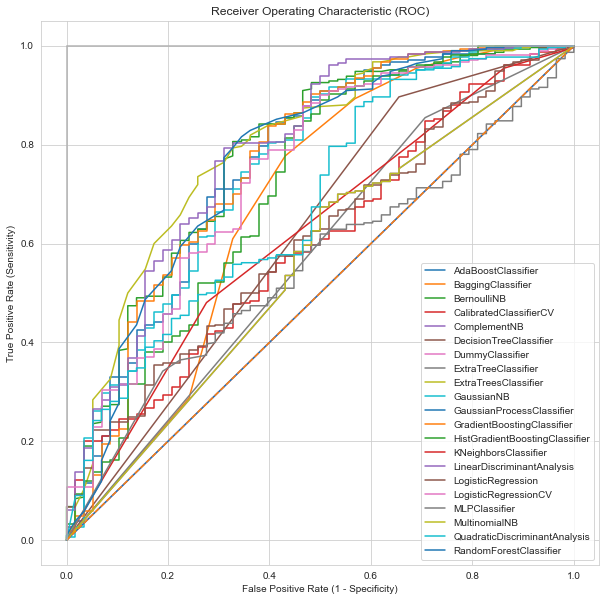

In [47]:
plt.figure()
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic (ROC)')

for i in range(ROC.shape[0]):
    plt.plot(ROC.loc[i]["False Positive Rate"], ROC.loc[i]["True Positive Rate"], label = ROC.loc[i]["Name"])    
    
    
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.legend()
plt.show()

In [48]:
Model_Information

,Name,Sensitivity,Specificity,Precision,F1Score,Training Accuracy (%),Testing Accuracy (%)
0,AdaBoostClassifier,0.600000,0.896341,0.413793,0.489796,86.66,85.14
1,BaggingClassifier,0.562500,0.880952,0.310345,0.400000,83.64,83.14
2,BernoulliNB,0.609756,0.899083,0.431034,0.505051,83.30,83.42
3,CalibratedClassifierCV,NaN,0.842391,0.000000,NaN,83.76,84.24
4,ComplementNB,0.181319,0.865591,0.568966,0.275000,53.14,49.10
5,DecisionTreeClassifier,0.384615,0.879747,0.344828,0.363636,78.55,75.71
6,DummyClassifier,NaN,0.842391,0.000000,NaN,83.76,84.24
7,ExtraTreeClassifier,0.274194,0.866013,0.293103,0.283333,76.32,75.62
8,ExtraTreesClassifier,0.789474,0.876791,0.258621,0.389610,85.42,85.14
9,GaussianNB,0.318966,0.916667,0.637931,0.425287,73.62,75.17


In [49]:
Best_List = []

In [50]:
Aspects = ['Sensitivity','Specificity','Precision','F1Score','Training Accuracy (%)','Testing Accuracy (%)']

In [51]:
for column in Aspects:
    for i in range(Model_Information.shape[0]):
        if (Model_Information.loc[i][column] == max(Model_Information[column])):
            print("Max {} is in {}".format(column, Model_Information.loc[i]["Name"]))
            List_Element = []
            List_Element.append(column)
            List_Element.append(Model_Information.loc[i]["Name"])
            List_Element.append(max(Model_Information[column]))
            Best_List.append(List_Element)

Max Sensitivity is in RandomForestClassifier
Max Specificity is in QuadraticDiscriminantAnalysis
Max Precision is in GaussianProcessClassifier
Max Precision is in LabelPropagation
Max Precision is in LabelSpreading
Max F1Score is in LinearDiscriminantAnalysis
Max Training Accuracy (%) is in LinearDiscriminantAnalysis
Max Testing Accuracy (%) is in RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]


In [52]:
Best_Model = pd.DataFrame(Best_List,columns=['Aspect','Name of Best','With Value'])
Best_Model

,Aspect,Name of Best,With Value
0,Sensitivity,RandomForestClassifier,0.833333
1,Specificity,QuadraticDiscriminantAnalysis,0.949153
2,Precision,GaussianProcessClassifier,1.000000
3,Precision,LabelPropagation,1.000000
4,Precision,LabelSpreading,1.000000
5,F1Score,LinearDiscriminantAnalysis,0.559140
6,Training Accuracy (%),LinearDiscriminantAnalysis,86.960000
7,Testing Accuracy (%),"RidgeClassifierCV(alphas=array([ 0.1, 1. , 10. ]",85.150000


In [53]:
# For predicting Performance

In [54]:
Target_Name = "PerformanceRating"
correlation_matrix = data.corr().round(2)
correlation_matrix[Target_Name]

Age                                  0.00
Attrition                           -0.00
DailyRate                            0.00
DistanceFromHome                     0.03
Education                           -0.02
EmployeeNumber                      -0.02
EnvironmentSatisfaction             -0.03
Gender                              -0.01
HourlyRate                          -0.00
JobInvolvement                      -0.03
JobLevel                            -0.02
JobSatisfaction                      0.00
MonthlyIncome                       -0.02
MonthlyRate                         -0.01
NumCompaniesWorked                  -0.01
OverTime                            -0.00
PercentSalaryHike                    0.77
PerformanceRating                    1.00
RelationshipSatisfaction            -0.03
StockOptionLevel                     0.00
TotalWorkingYears                    0.01
TrainingTimesLastYear               -0.02
WorkLifeBalance                      0.00
YearsAtCompany                    

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


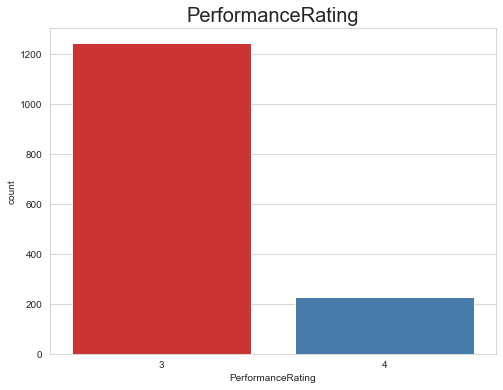

In [55]:
plt.figure(figsize=(8,6));
sns.countplot(data[Target_Name], palette='Set1');
plt.title(Target_Name,fontsize=20);
plt.show();

In [56]:
data[Target_Name].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [57]:
data[Target_Name] = data[Target_Name].map({data[Target_Name].unique()[1]:1 ,data[Target_Name].unique()[0]:0})

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


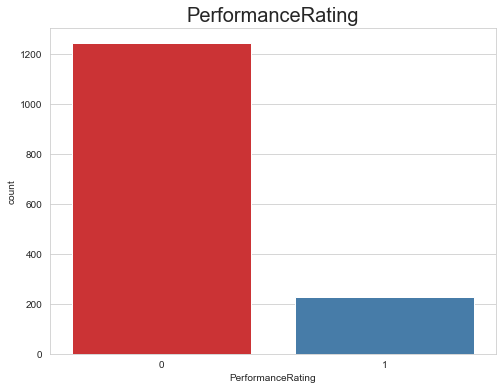

In [58]:
plt.figure(figsize=(8,6));
sns.countplot(data[Target_Name], palette='Set1');
plt.title(Target_Name,fontsize=20);
plt.show();

In [59]:
# So 3 is replaced with 0 and 4 replaced with 1

In [60]:
data[Target_Name].value_counts()
ratio = data[Target_Name].value_counts()[0]/ len(data[Target_Name])
print("We have {}% ones and the rest are zeros".format(round(ratio,4)*100))
print("We have to make sure that not all predictions are ones")

We have 84.63000000000001% ones and the rest are zeros
We have to make sure that not all predictions are ones


In [61]:
#                              data,  Y column , testsize,classification model, correltion limit to drop 
Corr_Limit = 0.01
ModelWithN = Best_Num_Features(data, Target_Name, 0.25, LogisticRegression(), Corr_Limit) # AdaBoostClassifier(), LogisticRegression()
ModelWithN

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

,# of Features (PCA),Sensitivity,Specificity,Presicion,F1Score,Training Score (%),Testing Score (%)
0,50 (Normal),0.947883,0.704918,0.941748,0.944805,90.6252,89.1233
1,39 (drop Features<0.01 corr),0.931596,0.622951,0.925566,0.928571,90.0779,86.7631
2,2,0.839674,NaN,1.000000,0.912851,84.8456,83.9830
3,3,0.839674,NaN,1.000000,0.912851,84.8456,83.9830
4,4,0.839674,NaN,1.000000,0.912851,84.8456,83.9830
5,5,0.839674,NaN,1.000000,0.912851,84.8456,83.9830
6,6,0.839674,NaN,1.000000,0.912851,84.7546,83.7083
7,7,0.973244,0.739130,0.941748,0.957237,94.0416,89.9440
8,8,0.982759,0.692308,0.922330,0.951586,94.1648,90.2930
9,9,0.979094,0.654321,0.909385,0.942953,94.1635,89.5708


In [62]:
print("1. Not to drop Anything")
print("2. to use PCA")
print("3. to drop features with lower correlation")
Input = input("Enter what do you want 1,2,3")
data_1 = data.copy()
X = data_1.drop(Target_Name,axis=1)
y = data_1[Target_Name]

if (Input == '1'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101, shuffle=True)

elif (Input == '2'):
    Input2 = input("Please, Enter number of PCA")
    pca = PCA(n_components=int(Input2)).fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(pca, y, test_size = 0.25, random_state = 101, shuffle=True)

elif (Input == '3'):
    Small_corr = []
    for column in range( correlation_matrix.shape[0] ):
        if ( abs(correlation_matrix[Target_Name][column]) < Corr_Limit):
            #print(correlation_matrix.columns[column] , correlation_matrix['Attrition'][column])
            Small_corr.append(correlation_matrix.columns[column])
    data_1.drop(Small_corr, axis=1, inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101, shuffle=True)
else:
    pass

1. Not to drop Anything
2. to use PCA
3. to drop features with lower correlation


Enter what do you want 1,2,3 1


In [63]:
# I will not PCA here
# I will use the whole data

In [64]:
ROC, Model_Information, Neglected_Models = Best_Classifier(X_train, y_train, X_test, y_test)
ROC

Average Training Score for AdaBoostClassifier = 100.0%
Average Testing Score for AdaBoostClassifier = 100.0%
Average Training Score for BaggingClassifier = 100.0%
Average Testing Score for BaggingClassifier = 100.0%
Average Training Score for BernoulliNB = 84.82%
Average Testing Score for BernoulliNB = 83.53%


C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_10216\667206299.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  Specificity = (TN/ (TN + FP) )


Average Training Score for CalibratedClassifierCV = 84.85%
Average Testing Score for CalibratedClassifierCV = 83.98%


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_10216\667206299.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  Specificity = (TN/ (TN + FP) )


Average Training Score for CategoricalNB = nan%
Average Testing Score for CategoricalNB = nan%
Average Training Score for ComplementNB = 46.34%
Average Testing Score for ComplementNB = 51.36%
Average Training Score for DecisionTreeClassifier = 100.0%
Average Testing Score for DecisionTreeClassifier = 100.0%
Average Training Score for DummyClassifier = 84.85%
Average Testing Score for DummyClassifier = 83.98%


C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_10216\667206299.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  Specificity = (TN/ (TN + FP) )


Average Training Score for ExtraTreeClassifier = 85.63%
Average Testing Score for ExtraTreeClassifier = 79.89%
Average Training Score for ExtraTreesClassifier = 92.56%
Average Testing Score for ExtraTreesClassifier = 89.87%
Average Training Score for GaussianNB = 97.46%
Average Testing Score for GaussianNB = 96.83%
Average Training Score for GaussianProcessClassifier = 84.85%
Average Testing Score for GaussianProcessClassifier = 83.98%


C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_10216\667206299.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  Specificity = (TN/ (TN + FP) )


Average Training Score for GradientBoostingClassifier = 100.0%
Average Testing Score for GradientBoostingClassifier = 100.0%
Average Training Score for HistGradientBoostingClassifier = 100.0%
Average Testing Score for HistGradientBoostingClassifier = 100.0%
Average Training Score for KNeighborsClassifier = 83.27%
Average Testing Score for KNeighborsClassifier = 82.81%
Average Training Score for LabelPropagation = 84.85%
Average Testing Score for LabelPropagation = 83.98%


D:\Anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_10216\667206299.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  Specificity = (TN/ (TN + FP) )
D:\Anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Average Training Score for LabelSpreading = 84.85%
Average Testing Score for LabelSpreading = 83.98%


D:\Anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_10216\667206299.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  Specificity = (TN/ (TN + FP) )
D:\Anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Average Training Score for LinearDiscriminantAnalysis = 96.43%
Average Testing Score for LinearDiscriminantAnalysis = 96.74%
Average Training Score for LinearSVC = 79.28%
Average Testing Score for LinearSVC = 69.66%


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Average Training Score for LogisticRegression = 90.63%
Average Testing Score for LogisticRegression = 89.12%


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Average Training Score for LogisticRegressionCV = 93.56%
Average Testing Score for LogisticRegressionCV = 92.02%


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Average Training Score for MLPClassifier = 72.0%
Average Testing Score for MLPClassifier = 73.37%
Average Training Score for MultinomialNB = 46.94%
Average Testing Score for MultinomialNB = 52.17%
Average Training Score for NearestCentroid = 45.31%
Average Testing Score for NearestCentroid = 49.36%
Average Training Score for NuSVC = nan%
Average Testing Score for NuSVC = nan%


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
21 fits failed out of a total of 21.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 189, in sklearn.svm._libsvm.fit
ValueError

Average Training Score for PassiveAggressiveClassifier = 69.27%
Average Testing Score for PassiveAggressiveClassifier = 73.06%
Average Training Score for Perceptron = 72.25%
Average Testing Score for Perceptron = 76.34%
Average Training Score for QuadraticDiscriminantAnalysis = 87.26%
Average Testing Score for QuadraticDiscriminantAnalysis = 79.7%


D:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Average Training Score for RadiusNeighborsClassifier = nan%
Average Testing Score for RadiusNeighborsClassifier = nan%
Average Training Score for RandomForestClassifier = 100.0%
Average Testing Score for RandomForestClassifier = 99.91%
Average Training Score for RidgeClassifier = 97.61%
Average Testing Score for RidgeClassifier = 97.37%
Average Training Score for RidgeClassifierCV = 97.7%
Average Testing Score for RidgeClassifierCV = 98.01%
Average Training Score for SGDClassifier = 75.11%
Average Testing Score for SGDClassifier = 69.13%
Average Training Score for SVC = 84.85%
Average Testing Score for SVC = 83.98%


C:\Users\Omar El-Sakka\AppData\Local\Temp\ipykernel_10216\667206299.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  Specificity = (TN/ (TN + FP) )


,Name,False Positive Rate,True Positive Rate,Threshold,AUC_Score
0,AdaBoostClassifier,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]","[1.9999999999999998, 0.9999999999999998, 2.220...",100.0000
1,BaggingClassifier,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]","[2.0, 1.0, 0.0]",100.0000
2,BernoulliNB,"[0.0, 0.003236245954692557, 0.0194174757281553...","[0.0, 0.0, 0.0, 0.01694915254237288, 0.0169491...","[1.3637920881004648, 0.36379208810046476, 0.28...",50.7295
3,CalibratedClassifierCV,"[0.0, 0.0, 0.0, 0.009708737864077669, 0.009708...","[0.0, 0.01694915254237288, 0.05084745762711865...","[1.2109653023869213, 0.2109653023869214, 0.198...",62.4266
4,ComplementNB,"[0.0, 0.47249190938511326, 0.47896440129449835...","[0.0, 0.4745762711864407, 0.4745762711864407, ...","[2.0, 1.0, 0.999999999996362, 0.99999999999272...",48.5492
5,DecisionTreeClassifier,"[0.0, 0.0, 1.0]","[0.0, 1.0, 1.0]","[2.0, 1.0, 0.0]",100.0000
6,DummyClassifier,"[0.0, 1.0]","[0.0, 1.0]","[1.1515426497277677, 0.1515426497277677]",50.0000
7,ExtraTreeClassifier,"[0.0, 0.10032362459546926, 1.0]","[0.0, 0.3898305084745763, 1.0]","[2.0, 1.0, 0.0]",64.4753
8,ExtraTreesClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.01694915254237288, 0.0847457627118644,...","[1.79, 0.79, 0.68, 0.67, 0.64, 0.63, 0.62, 0.6...",99.8190
9,GaussianNB,"[0.0, 0.0, 0.0, 0.016181229773462782, 0.016181...","[0.0, 0.01694915254237288, 0.9830508474576272,...","[1.9998667369110388, 0.9998667369110389, 0.626...",99.9726


<Figure size 432x288 with 0 Axes>

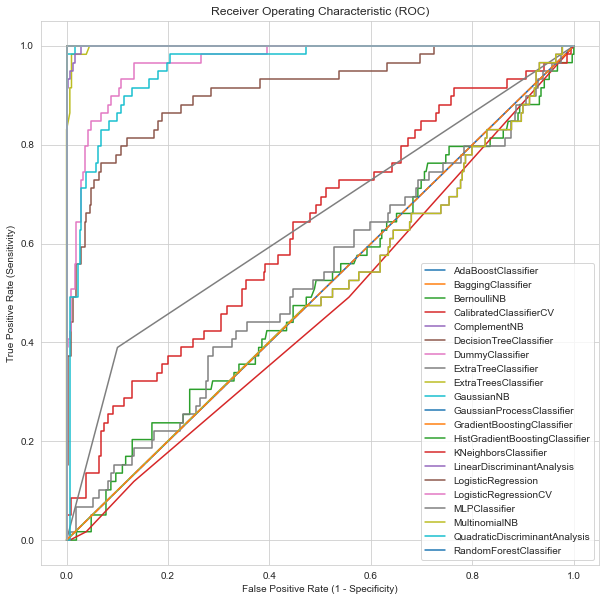

In [65]:
plt.figure()
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic (ROC)')

for i in range(ROC.shape[0]):
    plt.plot(ROC.loc[i]["False Positive Rate"], ROC.loc[i]["True Positive Rate"], label = ROC.loc[i]["Name"])    
    
    
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.legend()
plt.show()

In [66]:
Model_Information

,Name,Sensitivity,Specificity,Precision,F1Score,Training Accuracy (%),Testing Accuracy (%)
0,AdaBoostClassifier,1.000000,1.000000,1.000000,1.000000,100.00,100.00
1,BaggingClassifier,1.000000,1.000000,1.000000,1.000000,100.00,100.00
2,BernoulliNB,0.839674,NaN,1.000000,0.912851,84.82,83.53
3,CalibratedClassifierCV,0.839674,NaN,1.000000,0.912851,84.85,83.98
4,ComplementNB,0.825806,0.150235,0.414239,0.551724,46.34,51.36
5,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,100.00,100.00
6,DummyClassifier,0.839674,NaN,1.000000,0.912851,84.85,83.98
7,ExtraTreeClassifier,0.885350,0.425926,0.899676,0.892456,85.63,79.89
8,ExtraTreesClassifier,0.927928,1.000000,1.000000,0.962617,92.56,89.87
9,GaussianNB,0.996743,0.950820,0.990291,0.993506,97.46,96.83


In [67]:
Best_List = []

In [68]:
Aspects = ['Sensitivity','Specificity','Precision','F1Score','Training Accuracy (%)','Testing Accuracy (%)']

In [69]:
for column in Aspects:
    for i in range(Model_Information.shape[0]):
        if (Model_Information.loc[i][column] == max(Model_Information[column])):
            print("Max {} is in {}".format(column, Model_Information.loc[i]["Name"]))
            List_Element = []
            List_Element.append(column)
            List_Element.append(Model_Information.loc[i]["Name"])
            List_Element.append(max(Model_Information[column]))
            Best_List.append(List_Element)

Max Sensitivity is in AdaBoostClassifier
Max Sensitivity is in BaggingClassifier
Max Sensitivity is in DecisionTreeClassifier
Max Sensitivity is in GradientBoostingClassifier
Max Sensitivity is in HistGradientBoostingClassifier
Max Sensitivity is in RandomForestClassifier
Max Specificity is in AdaBoostClassifier
Max Specificity is in BaggingClassifier
Max Specificity is in DecisionTreeClassifier
Max Specificity is in ExtraTreesClassifier
Max Specificity is in GradientBoostingClassifier
Max Specificity is in HistGradientBoostingClassifier
Max Specificity is in RandomForestClassifier
Max Precision is in AdaBoostClassifier
Max Precision is in BaggingClassifier
Max Precision is in BernoulliNB
Max Precision is in CalibratedClassifierCV
Max Precision is in DecisionTreeClassifier
Max Precision is in DummyClassifier
Max Precision is in ExtraTreesClassifier
Max Precision is in GaussianProcessClassifier
Max Precision is in GradientBoostingClassifier
Max Precision is in HistGradientBoostingClassi

In [70]:
Best_Model = pd.DataFrame(Best_List,columns=['Aspect','Name of Best','With Value'])
Best_Model

,Aspect,Name of Best,With Value
0,Sensitivity,AdaBoostClassifier,1.0
1,Sensitivity,BaggingClassifier,1.0
2,Sensitivity,DecisionTreeClassifier,1.0
3,Sensitivity,GradientBoostingClassifier,1.0
4,Sensitivity,HistGradientBoostingClassifier,1.0
5,Sensitivity,RandomForestClassifier,1.0
6,Specificity,AdaBoostClassifier,1.0
7,Specificity,BaggingClassifier,1.0
8,Specificity,DecisionTreeClassifier,1.0
9,Specificity,ExtraTreesClassifier,1.0


In [143]:
#model = CatBoostClassifier(loss_function="Logloss", verbose=1).fit(X_train, y_train)
'''
KNeighborsClassifier()
DecisionTreeClassifier()
DecisionTreeRegressor()
RandomForestClassifier()
GradientBoostingClassifier()
GaussianNB()
SVC(kernel='rbf')
CatBoostClassifier()
clf = AdaBoostClassifier().fit(X_train, y_train)
cv = RepeatedKFold(n_splits=7, n_repeats=3, random_state=1)
scores1 = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1)
print('Average Training Score for Gaussian Naive Bayes = {}%'.format(np.round(scores1.mean()*100,2)))
scores2 = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv = cv, n_jobs=-1)
print('Average Testing Score for Gaussian Naive Bayes = {}%'.format(np.round(scores2.mean()*100,2)))
y_pred = model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
'''